In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
rev_badminton = pd.read_csv("data.csv")
rev_badminton.head()

Reviewer Name               Review Title  \
0            Kamal Suresh               Nice product   
1       Flipkart Customer     Don't waste your money   
2  A. S. Raja Srinivasan   Did not meet expectations   
3     Suresh Narayanasamy                       Fair   
4               ASHIK P A                Over priced   

               Place of Review  Up Votes  Down Votes     Month  \
0   Certified Buyer, Chirakkal     889.0        64.0  Feb 2021   
1   Certified Buyer, Hyderabad     109.0         6.0  Feb 2021   
2  Certified Buyer, Dharmapuri      42.0         3.0  Apr 2021   
3     Certified Buyer, Chennai      25.0         1.0       NaN   
4                          NaN     147.0        24.0  Apr 2016   

                                         Review text  Ratings  
0  Nice product, good quality, but price is now r...        4  
1  They didn't supplied Yonex Mavis 350. Outside ...        1  
2  Worst product. Damaged shuttlecocks packed in ...        1  
3  Quite O. K. , but nowadays  the quality of the...        3  
4  Over pricedJust â?¹620 ..from retailer.I didn'...        1

In [3]:
rev_badminton.shape

(8518, 8)

In [4]:
rev_badminton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8518 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 532.5+ KB


In [5]:
rev_badminton = rev_badminton.iloc[:-10]

In [6]:
rev_badminton["Ratings"].value_counts(normalize=True)

Ratings
5    0.596850
4    0.204984
1    0.089915
3    0.072285
2    0.035966
Name: proportion, dtype: float64

<Axes: xlabel='Ratings'>

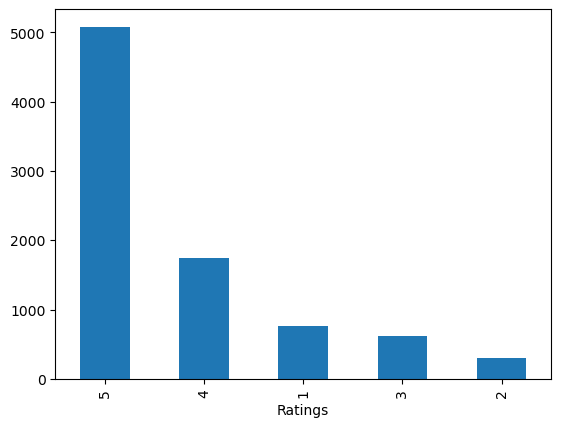

In [7]:

rev_badminton["Ratings"].value_counts().plot.bar()

In [10]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   -- ------------------------------------ 20.5/300.2 kB 217.9 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/300.2 kB 281.8 kB/s eta 0:00:01
   --------- ----------------------------- 71.7/300.2 kB 435.7 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/300.2 kB 535.8 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/300.2 kB 573.4 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/300.2 kB 586.1 kB/s eta 0:00:01
   ----------------------------- -------- 235.5/300.2 kB 654.9 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 798.7 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 798.7 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 798.7 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def display_wordcloud(data):
    wc = WordCloud(background_color='black',
               width=1600,
               height=800).generate(' '.join(data))
    plt.figure(1,figsize=(30,20))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

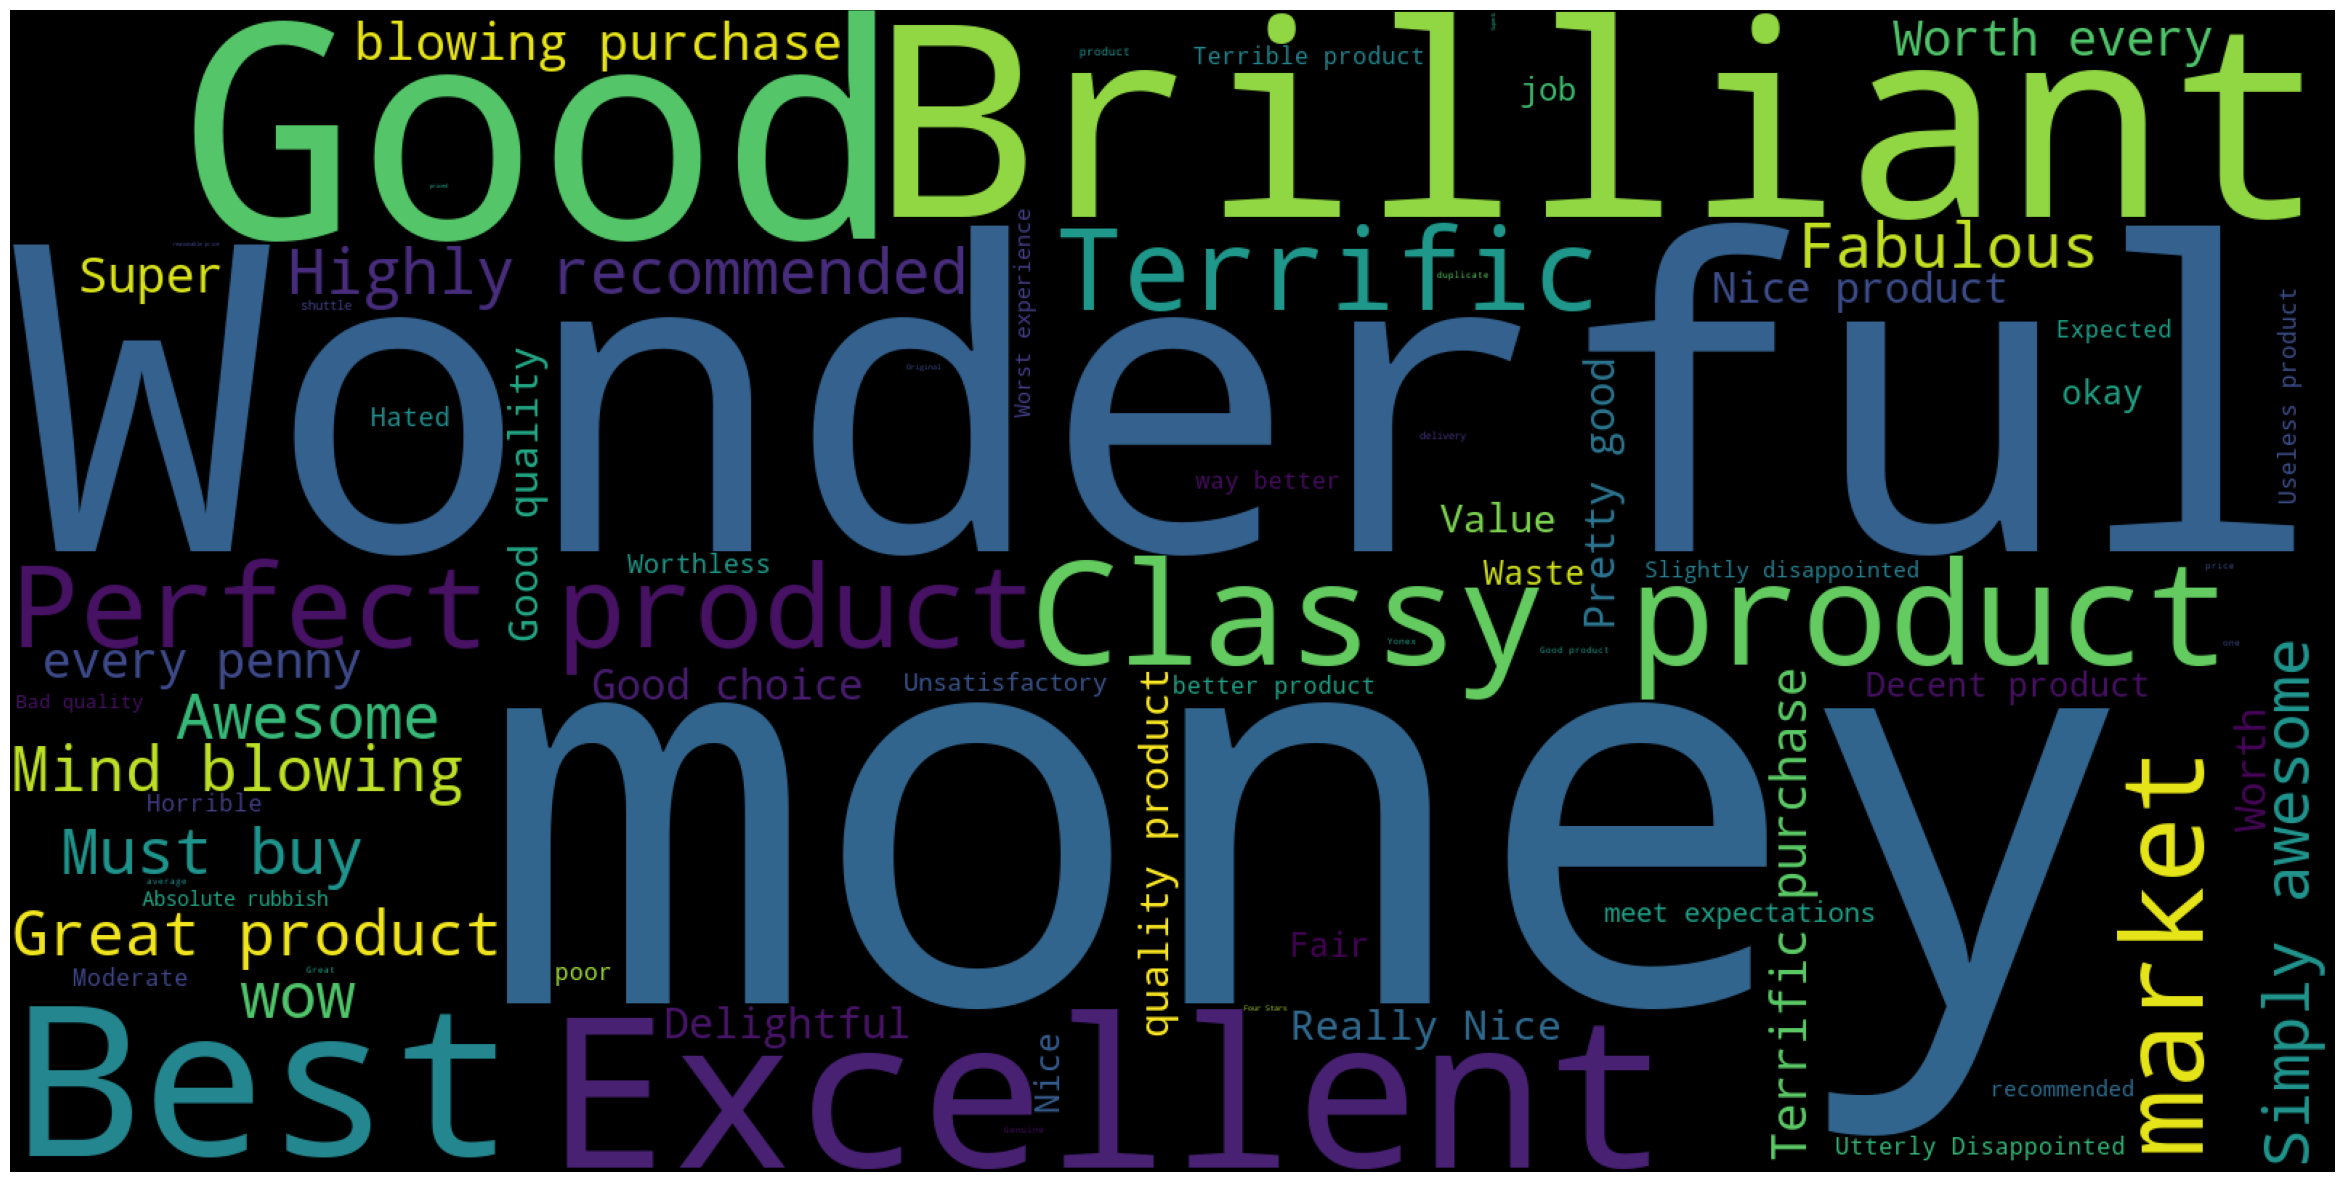

In [13]:
display_wordcloud(rev_badminton['Review Title'])

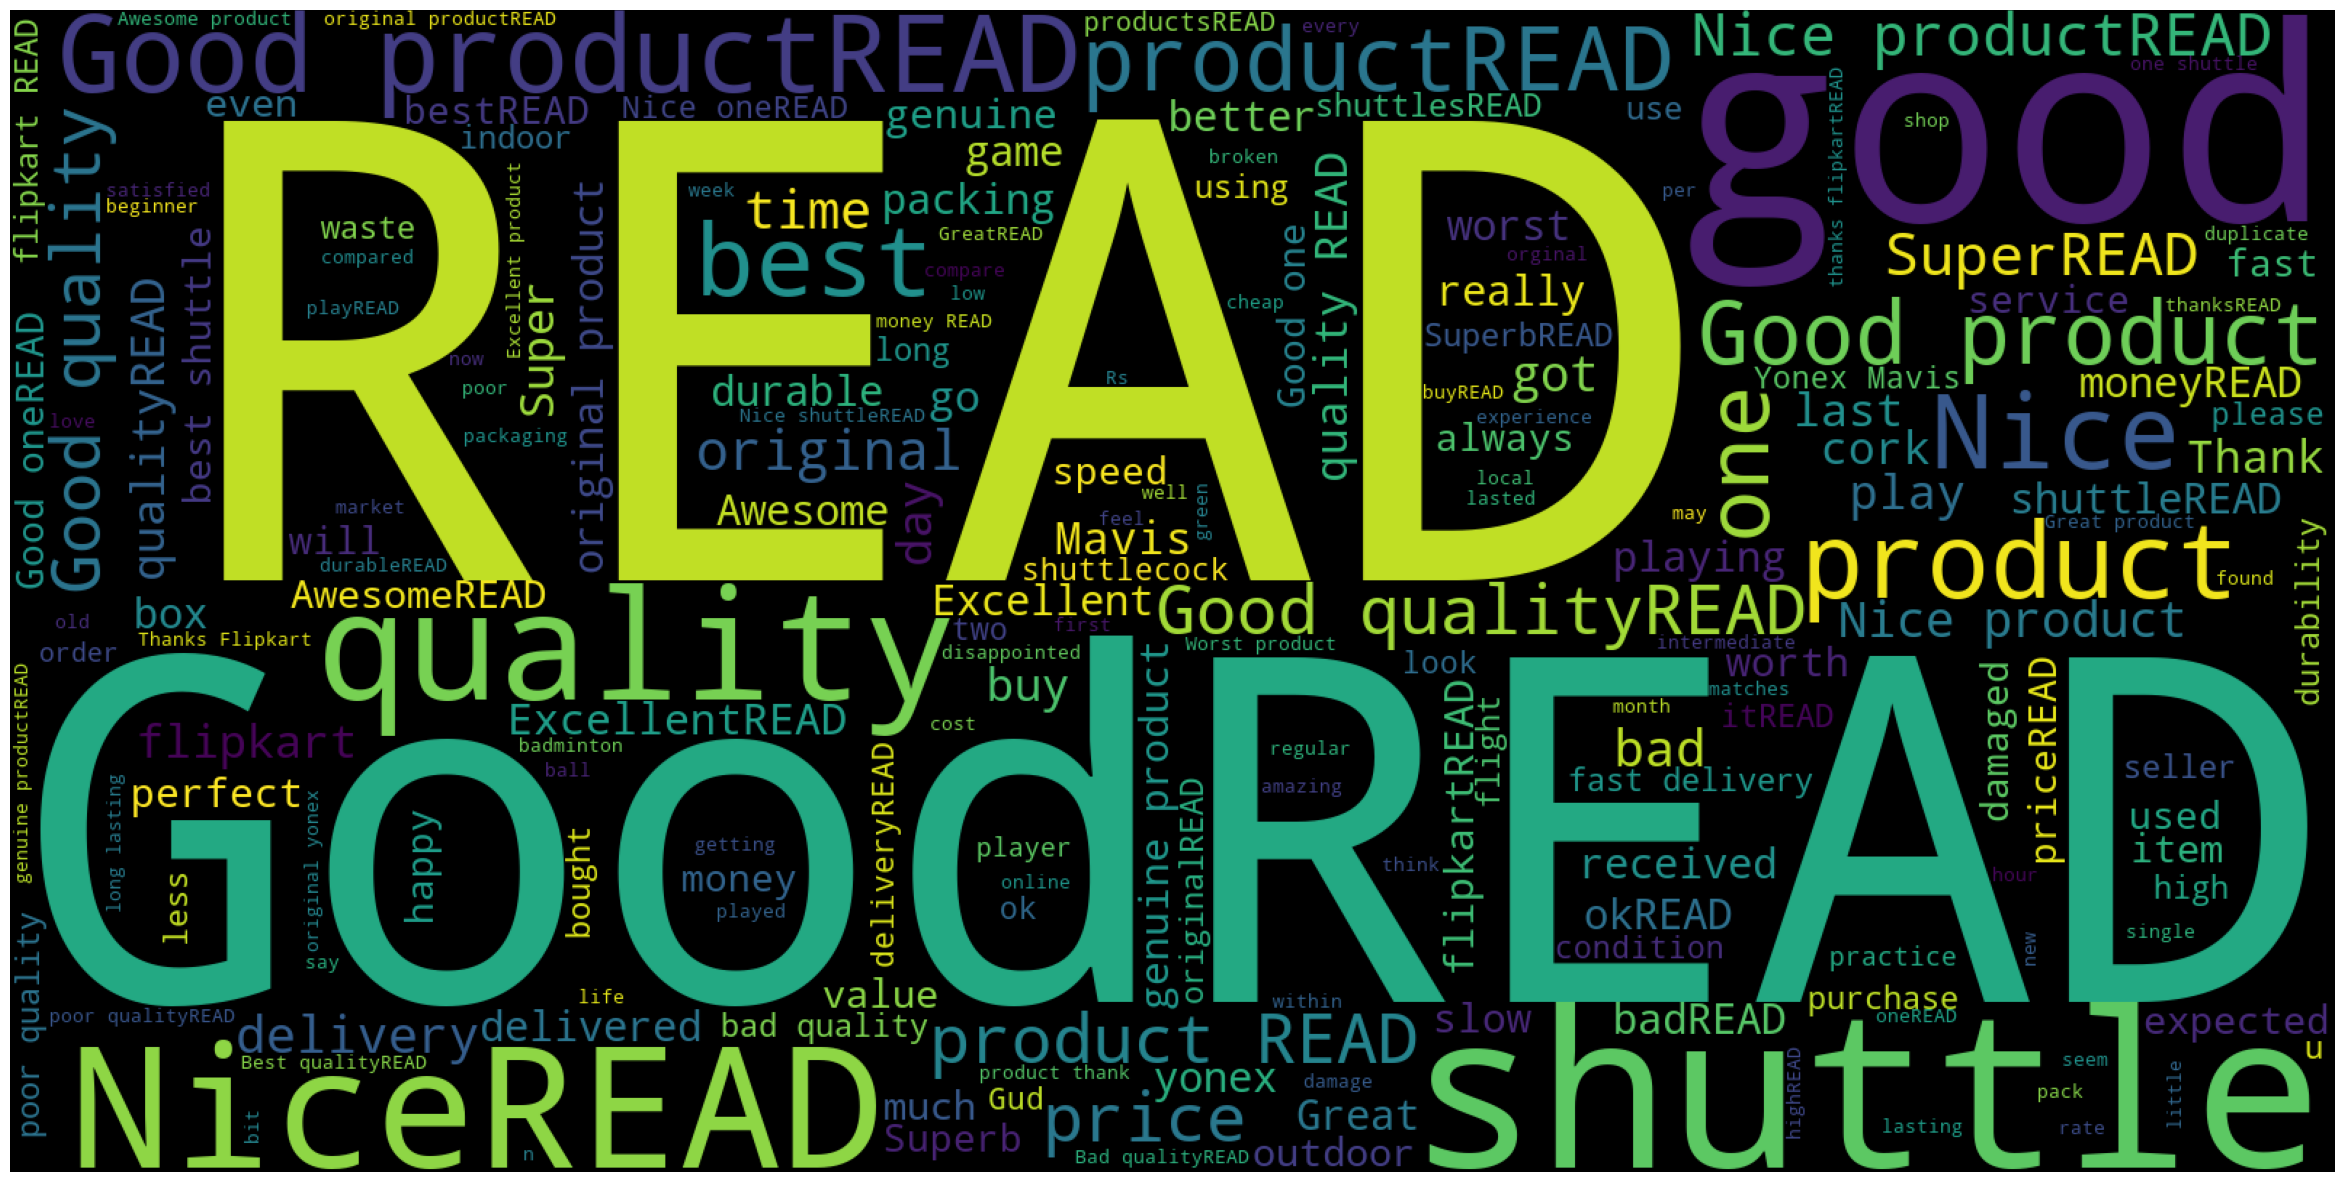

In [14]:
display_wordcloud(rev_badminton['Review text'])

In [16]:
X_text =  rev_badminton[["Review Title","Review text"]]

In [17]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def clean_text(text):
    # Remove "READ MORE"
    text = re.sub(r'READ MORE', '', text)
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation marks
    text = re.sub(f"[{string.punctuation}]", "", text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text into words
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize words to their base form
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a single string
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gdhiv\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gdhiv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gdhiv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
X_text["Clean_rev_title"] = X_text["Review Title"].apply(clean_text)

C:\Users\gdhiv\AppData\Local\Temp\ipykernel_5704\4063568690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_text["Clean_rev_title"] = X_text["Review Title"].apply(clean_text)


In [19]:
X_text["Clean_rev_text"] = X_text["Review text"].apply(clean_text)

C:\Users\gdhiv\AppData\Local\Temp\ipykernel_5704\125293498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_text["Clean_rev_text"] = X_text["Review text"].apply(clean_text)


In [20]:
X_text

Review Title  \
0                  Nice product   
1        Don't waste your money   
2     Did not meet expectations   
3                          Fair   
4                   Over priced   
...                         ...   
8503   Yones Mavis 350 Blue cap   
8504               For Mavis350   
8505                  Very Good   
8506     Don't waste your money   
8507                Really Nice   

                                            Review text       Clean_rev_title  \
0     Nice product, good quality, but price is now r...          nice product   
1     They didn't supplied Yonex Mavis 350. Outside ...      dont waste money   
2     Worst product. Damaged shuttlecocks packed in ...      meet expectation   
3     Quite O. K. , but nowadays  the quality of the...                  fair   
4     Over pricedJust â?¹620 ..from retailer.I didn'...                priced   
...                                                 ...                   ...   
8503  Wrost and duplicate productDon't buy this sell...  yones mavis blue cap   
8504        Received product intact and sealedREAD MORE                 mavis   
8505  Delivered before time but price is high from m...                  good   
8506  up to the mark but same is available in market...      dont waste money   
8507                       Nice delivery speedREAD MORE           really nice   

                                         Clean_rev_text  
0     nice product good quality price rising bad sig...  
1     didnt supplied yonex mavis outside cover yonex...  
2     worst product damaged shuttlecock packed new b...  
3     quite k nowadays quality cork like year back u...  
4     pricedjust â¹ retaileri didnt understand wat a...  
...                                                 ...  
8503  wrost duplicate productdont buy seller product...  
8504                     received product intact sealed  
8505                   delivered time price high market  
8506                     mark available market le price  
8507                                nice delivery speed  

[8508 rows x 4 columns]

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
X_title_vectorizer = TfidfVectorizer()
X_text_vectorizer = TfidfVectorizer()
X_title_vectors = X_title_vectorizer.fit_transform(X_text["Clean_rev_title"])
X_text_vectors = X_text_vectorizer.fit_transform(X_text["Clean_rev_text"])
X_title_vectors_array = X_title_vectors.toarray()
X_text_vectors_array = X_text_vectors.toarray()
df_title = pd.DataFrame(X_title_vectors_array, columns=X_title_vectorizer.get_feature_names_out())
df_text = pd.DataFrame(X_text_vectors_array, columns=X_text_vectorizer.get_feature_names_out())


In [22]:
X_title_vectorizer.get_feature_names_out()

array(['aboveaverage', 'absolute', 'asangbam', 'authenticated', 'average',
       'awesome', 'bad', 'badminton', 'barcode', 'best', 'better', 'blue',
       'book', 'brand', 'brilliant', 'buy', 'buying', 'cancelled', 'cap',
       'cheating', 'choice', 'class', 'classy', 'compared', 'cost',
       'costly', 'could', 'counterfeit', 'daily', 'deal', 'decent',
       'delightful', 'delivery', 'disappointed', 'discount', 'dont',
       'door', 'duplicate', 'durable', 'ekart', 'even', 'ever', 'every',
       'excellent', 'expectation', 'expected', 'experience', 'fabulous',
       'fair', 'fast', 'faulty', 'finally', 'first', 'five', 'fk',
       'flipkart', 'four', 'game', 'genuine', 'genuinity', 'get', 'good',
       'great', 'happy', 'hated', 'hi', 'high', 'highly', 'horrible',
       'inflated', 'intermediate', 'job', 'lacking', 'lasting', 'late',
       'lightening', 'like', 'logistics', 'lol', 'long', 'low', 'lowest',
       'market', 'mavis', 'mechanism', 'meet', 'mindblowing', 'mixin

In [23]:
X_dtm = pd.concat([df_title,df_text], axis=1)

In [24]:
X_dtm["Ratings"] = rev_badminton["Ratings"]

In [25]:
X_dtm

aboveaverage  absolute  asangbam  authenticated  average  awesome  bad  \
0              0.0       0.0       0.0            0.0      0.0      0.0  0.0   
1              0.0       0.0       0.0            0.0      0.0      0.0  0.0   
2              0.0       0.0       0.0            0.0      0.0      0.0  0.0   
3              0.0       0.0       0.0            0.0      0.0      0.0  0.0   
4              0.0       0.0       0.0            0.0      0.0      0.0  0.0   
...            ...       ...       ...            ...      ...      ...  ...   
8503           0.0       0.0       0.0            0.0      0.0      0.0  0.0   
8504           0.0       0.0       0.0            0.0      0.0      0.0  0.0   
8505           0.0       0.0       0.0            0.0      0.0      0.0  0.0   
8506           0.0       0.0       0.0            0.0      0.0      0.0  0.0   
8507           0.0       0.0       0.0            0.0      0.0      0.0  0.0   

      badminton  barcode  best  ...  yonox  yoogot  you  youplz  youtube   yr  \
0           0.0      0.0   0.0  ...    0.0     0.0  0.0     0.0      0.0  0.0   
1           0.0      0.0   0.0  ...    0.0     0.0  0.0     0.0      0.0  0.0   
2           0.0      0.0   0.0  ...    0.0     0.0  0.0     0.0      0.0  0.0   
3           0.0      0.0   0.0  ...    0.0     0.0  0.0     0.0      0.0  0.0   
4           0.0      0.0   0.0  ...    0.0     0.0  0.0     0.0      0.0  0.0   
...         ...      ...   ...  ...    ...     ...  ...     ...      ...  ...   
8503        0.0      0.0   0.0  ...    0.0     0.0  0.0     0.0      0.0  0.0   
8504        0.0      0.0   0.0  ...    0.0     0.0  0.0     0.0      0.0  0.0   
8505        0.0      0.0   0.0  ...    0.0     0.0  0.0     0.0      0.0  0.0   
8506        0.0      0.0   0.0  ...    0.0     0.0  0.0     0.0      0.0  0.0   
8507        0.0      0.0   0.0  ...    0.0     0.0  0.0     0.0      0.0  0.0   

      zero        â¹  𝙊𝙪𝙩𝙨𝙩𝙖𝙣𝙙𝙞𝙣𝙜  Ratings  
0      0.0  0.000000          0.0        4  
1      0.0  0.000000          0.0        1  
2      0.0  0.000000          0.0        1  
3      0.0  0.000000          0.0        3  
4      0.0  0.320486          0.0        1  
...    ...       ...          ...      ...  
8503   0.0  0.000000          0.0        1  
8504   0.0  0.000000          0.0        5  
8505   0.0  0.000000          0.0        3  
8506   0.0  0.000000          0.0        4  
8507   0.0  0.000000          0.0        5  

[8508 rows x 3154 columns]

In [26]:
from sklearn.cluster import KMeans
k_means= KMeans(n_clusters=2,init = 'k-means++' ,random_state=0)
labels = k_means.fit_predict(X_dtm)

C:\Users\gdhiv\OneDrive\Documents\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [27]:
X_dtm["cluster_id"] = labels

In [28]:
X_dtm["cluster_id"].value_counts()

cluster_id
1    6822
0    1686
Name: count, dtype: int64

<Axes: xlabel='cluster_id'>

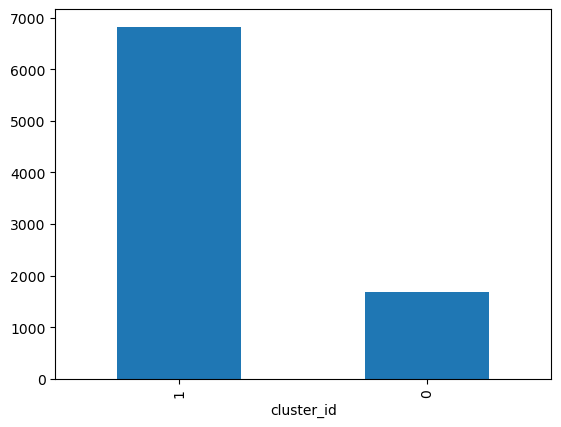

In [29]:
X_dtm["cluster_id"].value_counts().plot.bar()

In [30]:
final_df = rev_badminton[["Review Title","Review text"]]

In [31]:
final_df["cluster_id"] = X_dtm["cluster_id"]

C:\Users\gdhiv\AppData\Local\Temp\ipykernel_5704\1290353623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["cluster_id"] = X_dtm["cluster_id"]


In [32]:
final_df

Review Title  \
0                  Nice product   
1        Don't waste your money   
2     Did not meet expectations   
3                          Fair   
4                   Over priced   
...                         ...   
8503   Yones Mavis 350 Blue cap   
8504               For Mavis350   
8505                  Very Good   
8506     Don't waste your money   
8507                Really Nice   

                                            Review text  cluster_id  
0     Nice product, good quality, but price is now r...           1  
1     They didn't supplied Yonex Mavis 350. Outside ...           0  
2     Worst product. Damaged shuttlecocks packed in ...           0  
3     Quite O. K. , but nowadays  the quality of the...           0  
4     Over pricedJust â?¹620 ..from retailer.I didn'...           0  
...                                                 ...         ...  
8503  Wrost and duplicate productDon't buy this sell...           0  
8504        Received product intact and sealedREAD MORE           1  
8505  Delivered before time but price is high from m...           0  
8506  up to the mark but same is available in market...           1  
8507                       Nice delivery speedREAD MORE           1  

[8508 rows x 3 columns]

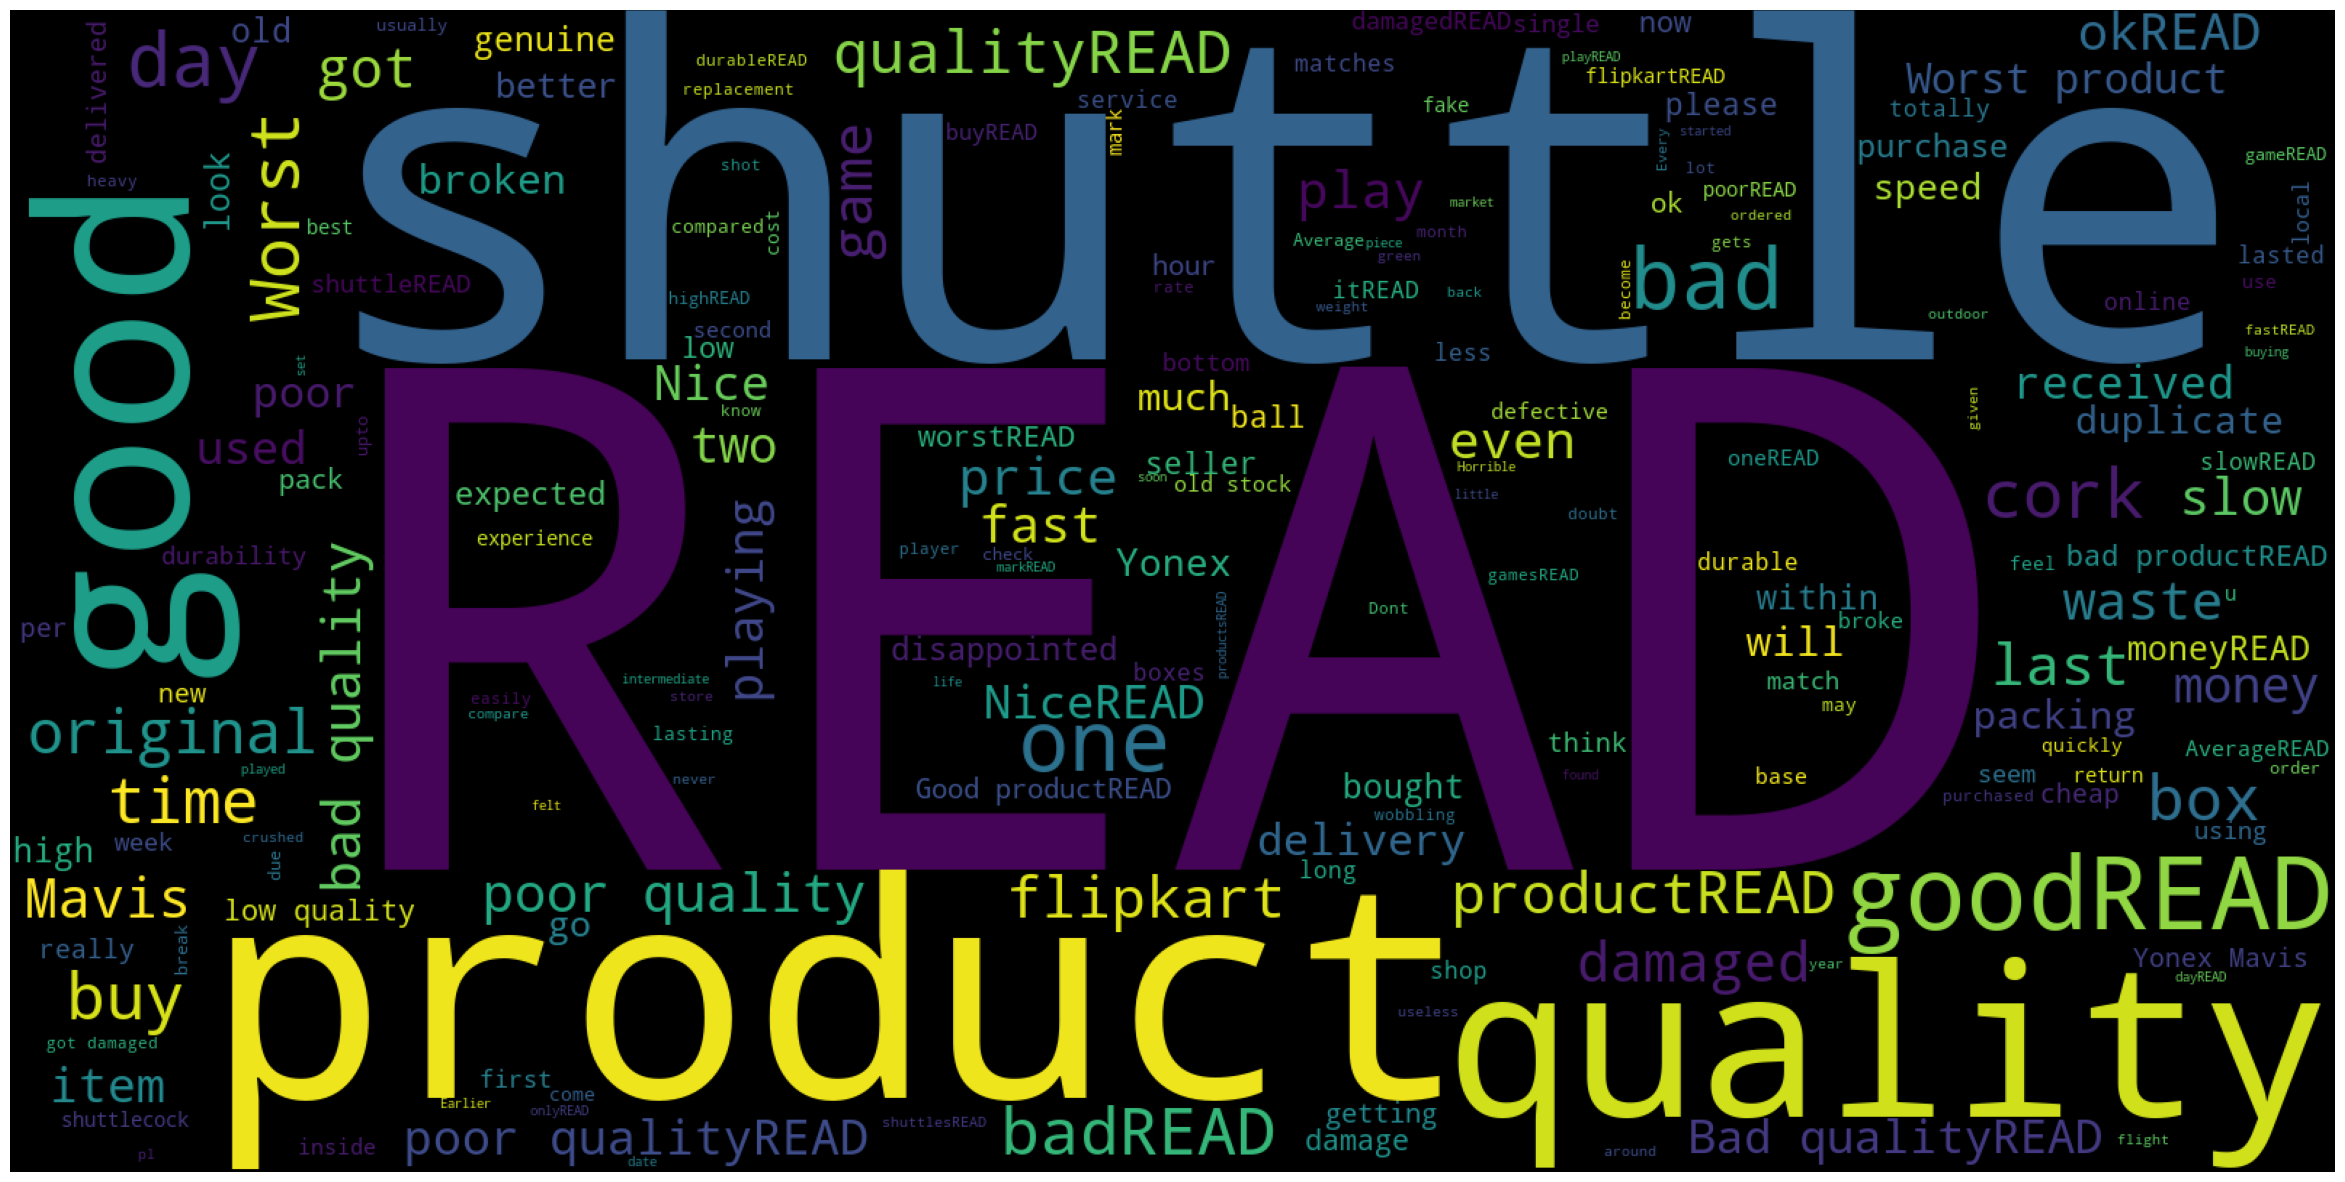

In [33]:
display_wordcloud(final_df["Review text"].loc[final_df["cluster_id"]==0])

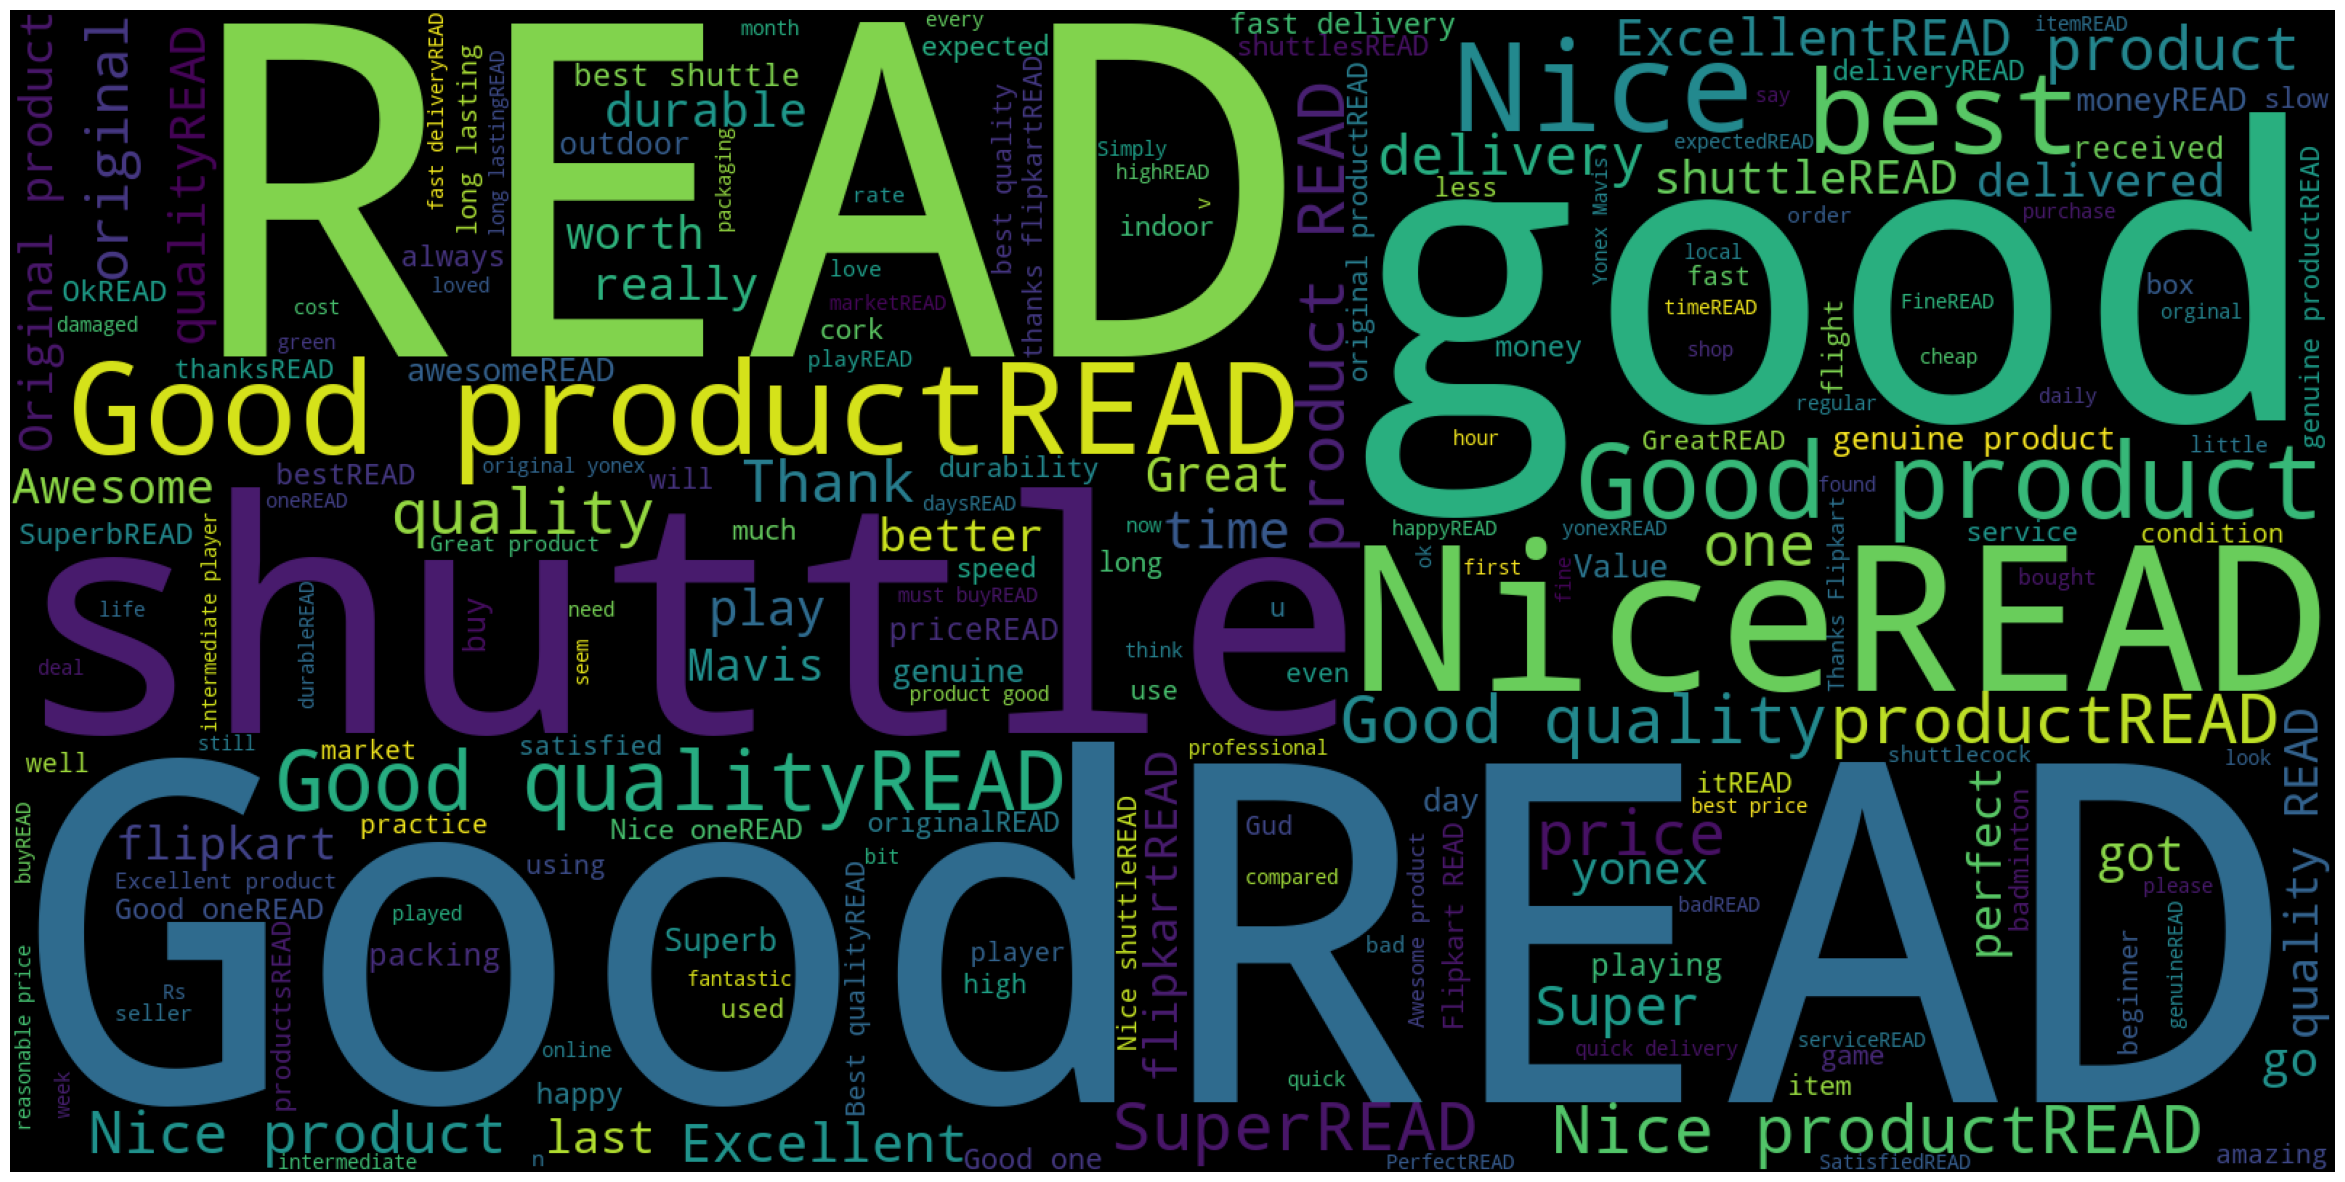

In [34]:
display_wordcloud(final_df["Review text"].loc[final_df["cluster_id"]==1])

In [35]:
final_df["cluster_id"]

0       1
1       0
2       0
3       0
4       0
       ..
8503    0
8504    1
8505    0
8506    1
8507    1
Name: cluster_id, Length: 8508, dtype: int32

In [36]:
X = final_df[["Review Title","Review text"]]
y = final_df["cluster_id"]

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [38]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import joblib
from joblib import Memory
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

import os

In [39]:
X_train

Review Title                                        Review text
5748           Brilliant  Order got delivered within 24 hrs ...amazing d...
2952           Excellent                                      GoodREAD MORE
7270      Classy product                              Good productREAD MORE
7124         Pretty good                 best quality in low priseREAD MORE
5104   Terrific purchase                              Poor qualityREAD MORE
...                  ...                                                ...
7161   Worth every penny                               goodqualityREAD MORE
2707          Delightful                                    UsefulREAD MORE
6400           Hated it!                                 very goodREAD MORE
1688  Highly recommended                              Good qualityREAD MORE
5994        Does the job          perfect shuttle for outdoor playREAD MORE

[6381 rows x 2 columns]

In [40]:
%time X_title_clean = X_train["Review Title"].apply(lambda doc: clean_text(doc))

CPU times: total: 2.09 s
Wall time: 2.14 s


In [41]:
%time X_text_clean = X_train["Review text"].apply(lambda doc: clean_text(doc))

CPU times: total: 2.25 s
Wall time: 2.3 s


In [42]:
X_train_clean = pd.DataFrame(X_title_clean)

In [43]:
X_train_clean["Review text"] = X_text_clean
X_train_clean

Review Title                                        Review text
5748           brilliant  order got delivered within hr amazing delivery...
2952           excellent                                               good
7270      classy product                                       good product
7124         pretty good                             best quality low prise
5104   terrific purchase                                       poor quality
...                  ...                                                ...
7161   worth every penny                                        goodquality
2707          delightful                                             useful
6400               hated                                               good
1688  highly recommended                                       good quality
5994                 job                       perfect shuttle outdoor play

[6381 rows x 2 columns]

In [44]:
%time X_test_clean = X_test["Review Title"].apply(lambda doc: clean_text(doc))

CPU times: total: 688 ms
Wall time: 688 ms


In [45]:
X_test_clean = pd.DataFrame(X_test_clean)

In [46]:
X_test_clean["Review text"]=X_test["Review text"].apply(lambda doc: clean_text(doc))

In [47]:
X_test_clean

Review Title                                        Review text
8325     terrific purchase                        thanks team timely delivery
434              brilliant                                       good product
3309  mindblowing purchase                                   original product
7906                  nice                                            avarage
923            best market                                                 tq
...                    ...                                                ...
5339       perfect product                awesome product original durability
1571             wonderful                                          nice item
3227       perfect product                               product quality mark
8399          nice product  good product proffesional player long lasting ...
7417                   wow                                           ultimate

[2127 rows x 2 columns]

In [48]:
import warnings

warnings.filterwarnings('ignore')

In [49]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.


In [57]:
import mlflow

mlflow.set_experiment("sentiment_analysis_prediction")

Traceback (most recent call last):
  File "C:\Users\gdhiv\OneDrive\Documents\anaconda\Lib\site-packages\mlflow\store\tracking\file_store.py", line 302, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gdhiv\OneDrive\Documents\anaconda\Lib\site-packages\mlflow\store\tracking\file_store.py", line 395, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gdhiv\OneDrive\Documents\anaconda\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1320, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\gdhiv\OneDrive\Documents\anaconda\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1313, in _read_helper
    result = read_yaml(root,

<Experiment: artifact_location='file:///C:/Users/gdhiv/sentiment/mlruns/726803206482310827', creation_time=1713432075519, experiment_id='726803206482310827', last_update_time=1713432075519, lifecycle_stage='active', name='sentiment_analysis_prediction', tags={}>

In [58]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

preprocessor = ColumnTransformer(
    transformers=[
        ('text_1', TfidfVectorizer(), 'Review Title'),  # TF-IDF vectorization for text_data_1
        ('text_2', TfidfVectorizer(), 'Review text'),  # TF-IDF vectorization for text_data_2    
    ])

pipelines = {
    'naive_bayes': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory),
    'logistic_regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ], memory=memory)
}
param_grids = {
    'naive_bayes': [
        {'classifier__alpha' : [1, 10]}
    ],
    'decision_tree': [
        {'classifier__max_depth': [None, 5, 10]}
    ],
    'logistic_regression': [
        {'classifier__C': [0.1, 1, 10], 
         'classifier__penalty': ['elasticnet'], 
         'classifier__l1_ratio': [0.4, 0.5, 0.6],
         'classifier__solver': ['saga'],
         'classifier__class_weight': ['balanced']
        }
    ]
}
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    
    mlflow.sklearn.autolog(max_tuning_runs=None)
    
    with mlflow.start_run() as run:
        %time grid_search.fit(X_train_clean, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test_clean, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 36.2 s
Wall time: 42.9 s
Score on Test Data:  0.9231190150478796
********** decision_tree **********
Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: total: 38 s
Wall time: 45.7 s
Score on Test Data:  0.9176144244105409
********** logistic_regression **********
Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: total: 1min 33s
Wall time: 1min 41s
Score on Test Data:  0.8989234449760766


In [59]:
for name, model in best_models.items():
    print(f"{name}")
    print(f"{model}")
    print()

naive_bayes
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text_1', TfidfVectorizer(),
                                                  'Review Title'),
                                                 ('text_2', TfidfVectorizer(),
                                                  'Review text')])),
                ('classifier', MultinomialNB(alpha=1))])

decision_tree
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('preprocessor',
                 ColumnTransformer(transformers=[('text_1', TfidfVectorizer(),
                                                  'Review Title'),
                                                 ('text_2', TfidfVectorizer(),
                                                  'Review text')])),
                ('classifier', DecisionTreeClassifier(max_depth=10))])

logistic_regression
Pipeline(memory=Memory(location=.cache\joblib),
         steps=[('preproce

In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline

In [61]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

preprocessor = ColumnTransformer(
    transformers=[
        ('text_1', TfidfVectorizer(), 'Review Title'),  # TF-IDF vectorization for text_data_1
        ('text_2', TfidfVectorizer(), 'Review text'),  # TF-IDF vectorization for text_data_2    
    ])

pipelines = {
    'knn' : Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]), 
    'svc' : Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', SVC())
    ]),
    'logistic_regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression())
    ]),
    'random_forest': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier())
    ]),
    'decision_tree': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier())
    ]),
    'naive_bayes': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', MultinomialNB())
    ], memory=memory)
}
param_grids = {
    'knn': [
        {
            'classifier__n_neighbors' : [i for i in range(3, 21, 2)], 
            'classifier__p' : [1, 2, 3]
        }
    ],
    'svc': [
        {
            'classifier__kernel' : ['rbf'], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'classifier__kernel' : ['poly'], 
            'classifier__degree' : [2, 3, 4, 5], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }, 
        {
            'classifier__kernel' : ['linear'], 
            'classifier__C' : [0.1, 0.01, 1, 10, 100]
        }
    ],
    'logistic_regression': [
        {
            
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l2']
        }, 
        {
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['l1'], 
            'classifier__solver': ['liblinear']
        }, 
        {
            'classifier__C': [0.1, 1, 10], 
            'classifier__penalty': ['elasticnet'], 
            'classifier__l1_ratio': [0.4, 0.5, 0.6],
            'classifier__solver': ['saga']
        }
    ],
    'random_forest': [
        {
            'classifier__n_estimators': [50, 100, 200]
        }
    ],
    'decision_tree': [
        {
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    'naive_bayes': [
        {'classifier__alpha' : [1, 10]}
    ]
    
}

In [62]:
best_models = {}

# Run the Pipeline
for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='accuracy', 
                               return_train_score=True,
                               verbose=1
                              )
    
    mlflow.sklearn.autolog(max_tuning_runs=None)
    
    with mlflow.start_run() as run:
        
        %time grid_search.fit(X_train_clean, y_train)
        
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test_clean, y_test))
    
    best_models[algo] = grid_search.best_estimator_
    print()

********** knn **********
Fitting 5 folds for each of 27 candidates, totalling 135 fits
CPU times: total: 6min 55s
Wall time: 2min 42s
Train Score:  0.8260450752768416
Test Score:  0.8349788434414669

********** svc **********
Fitting 5 folds for each of 30 candidates, totalling 150 fits
CPU times: total: 6min 21s
Wall time: 6min 29s
Train Score:  0.8716487506229088
Test Score:  0.8871650211565585

********** logistic_regression **********
Fitting 5 folds for each of 15 candidates, totalling 75 fits
CPU times: total: 1min 42s
Wall time: 1min 48s
Train Score:  0.8732162714826824
Test Score:  0.8895157498824635

********** random_forest **********
Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: total: 3min 6s
Wall time: 3min 13s
Train Score:  0.8675759703262201
Test Score:  0.8777621062529384

********** decision_tree **********
Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: total: 38.5 s
Wall time: 44.6 s
Train Score:  0.8558214663580148
Te

In [63]:
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)

preprocessor = ColumnTransformer(
    transformers=[
        ('text_1', TfidfVectorizer(), 'Review Title'),  # TF-IDF vectorization for text_data_1
        ('text_2', TfidfVectorizer(), 'Review text'),  # TF-IDF vectorization for text_data_2    
    ])

pipe_1 = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory)



# Observe the Key Value Pair format
parameter_grid_1 = [
        {
            'classifier__max_depth': [None, 5, 10]
        }
    ]

In [64]:
clf = GridSearchCV(
    estimator=pipe_1, 
    param_grid=parameter_grid_1, 
    scoring='accuracy',
    cv=5,
    return_train_score=True,
    verbose=1
)

# Initialize the auto logger
# max_tuning_runs=None will make sure that all the runs are recorded.
# By default top 5 runs will be recorded for each experiment
mlflow.sklearn.autolog(max_tuning_runs=None)

with mlflow.start_run() as run:
    mlflow.set_tag("stage", "Production")
    %time clf.fit(X_train_clean, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
CPU times: total: 41.1 s
Wall time: 48.5 s
